In [4]:
class Value:
    def __init__(self, data, _children=(), _opp="", _label="") -> None:
        self.data = data
        self.prev = _children
        self.opp = _opp
        self.label = _label
    
    def __repr__(self) -> str:
        return f"value: ({self.data})"
    def __add__(self, other):
        res = Value(self.data+other.data, (self, other), "+")
        return res
    def __mul__(self, other):
        res = Value(self.data*other.data, (self, other), "*")
        return res

a = Value(2.0, _label="a")
b = Value(-3.0, _label="b")
c = Value(10.0, _label="c")
e = a*b; e.label = "e"
d = e+c; d.label = "d"
d.prev


(value: (-6.0), value: (10.0))

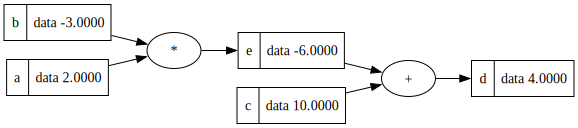

In [5]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        dot.node(name=uid, label="{%s|data %.4f}"%(n.label,n.data,), shape='record')
        if n.opp:
            dot.node(name=uid+n.opp, label=n.opp)
            dot.edge(uid+n.opp, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.opp)
    return dot

draw_dot(d)